<a href="https://colab.research.google.com/github/MpRonald/Deep-Learning/blob/main/Sentiment_Analisys_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [25]:
alexa = pd.read_csv('/content/drive/MyDrive/Datasets/amazon-alexa.tsv', sep='\t')
alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### Exploratory Analisys

In [26]:
alexa.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [27]:
positive = alexa[alexa['feedback'] == 1]
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [28]:
negative = alexa[alexa['feedback'] != 1]
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


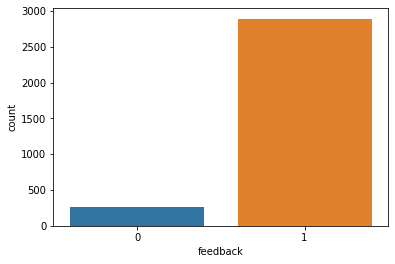

In [29]:
sns.countplot(alexa.feedback, label='count');

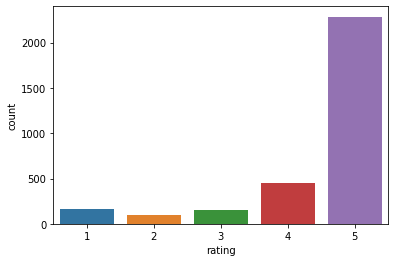

In [30]:
sns.countplot(alexa.rating, label='count');

In [31]:
alexa.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [32]:
alexa.verified_reviews.duplicated().sum()

849

In [33]:
alexa.shape

(3150, 5)

In [34]:
849/3150

0.2695238095238095

### Cleaning Dataset

In [35]:
alexa = alexa.drop(['date', 'rating'], axis=1)
alexa

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [36]:
var_dummies = pd.get_dummies(alexa.variation)
alexa.drop(['variation'], axis=1, inplace=True)
alexa = pd.concat([alexa, var_dummies], axis=1)
alexa

,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Tokenization

In [38]:
vector = CountVectorizer()
alexa_vect = vector.fit_transform(alexa['verified_reviews'])

In [39]:
type(alexa_vect)

scipy.sparse.csr.csr_matrix

In [41]:
alexa.drop(['verified_reviews'], axis=1, inplace=True)
alexa

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [42]:
reviews = pd.DataFrame(alexa_vect.toarray())
reviews

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
alexa = pd.concat([alexa, reviews], axis=1)
alexa.head()

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X = alexa.drop(['feedback'], axis=1)
y = alexa['feedback']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2520, 4060), (630, 4060), (2520,), (630,))

### Builting Model

In [78]:
clf = tf.keras.models.Sequential()
clf.add(tf.keras.layers.Dense(units=500, activation='linear', input_shape=(X_train.shape[1],)))
clf.add(tf.keras.layers.Dense(units=300, activation='tanh'))
clf.add(tf.keras.layers.Dense(units=100, activation='relu'))
clf.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [79]:
clf.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 500)               2030500   
                                                                 
 dense_31 (Dense)            (None, 300)               150300    
                                                                 
 dense_32 (Dense)            (None, 100)               30100     
                                                                 
 dense_33 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,211,001
Trainable params: 2,211,001
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
79/79 [==============================] - 3s 26ms/step - loss: 0.0623 - accuracy: 0.9794
Epoch 2/100
79/79 [==============================] - 1s 14ms/step - loss: 0.0600 - accuracy: 0.9821
Epoch 3/100
79/79 [==============================] - 1s 14ms/step - loss: 0.0582 - accuracy: 0.9829
Epoch 4/100
79/79 [==============================] - 1s 14ms/step - loss: 0.0560 - accuracy: 0.9829
Epoch 5/100
79/79 [==============================] - 1s 14ms/step - loss: 0.0541 - accuracy: 0.9845
Epoch 6/100
79/79 [==============================] - 1s 14ms/step - loss: 0.0522 - accuracy: 0.9849
Epoch 7/100
79/79 [==============================] - 1s 14ms/step - loss: 0.0506 - accuracy: 0.9845
Epoch 8/100
79/79 [==============================] - 2s 26ms/step - loss: 0.0489 - accuracy: 0.9853
Epoch 9/100
79/79 [==============================] - 2s 29ms/step - loss: 0.0473 - accuracy: 0.9857
Epoch 10/100
79/79 [==============================] - 2s 21ms/step - loss: 0.0460 - accuracy: 0.9853

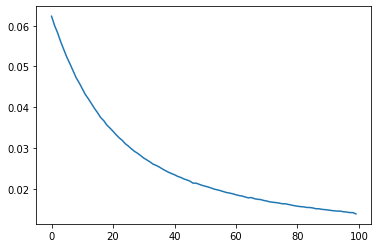

In [83]:
clf.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
epochs_hist = clf.fit(X_train, y_train, epochs=100)
sns.lineplot(data=epochs_hist.history['loss'])

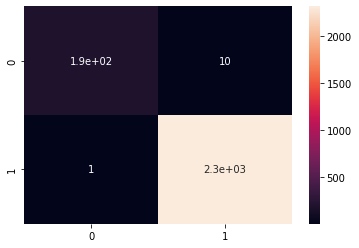

In [88]:
y_pred_train = clf.predict(X_train)
y_pred_train = (y_pred_train > 0.5)
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True);

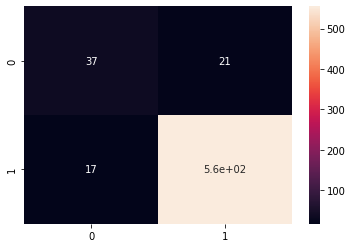

In [89]:
y_pred_test = clf.predict(X_test)
y_pred_test = (y_pred_test > 0.5)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True);

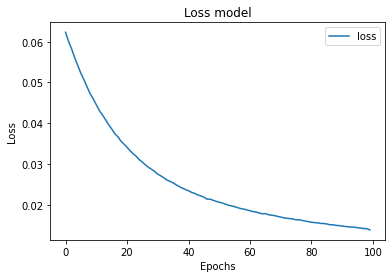

In [92]:
plt.title('Loss model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
sns.lineplot(data=epochs_hist.history['loss'])
plt.legend(['loss']);

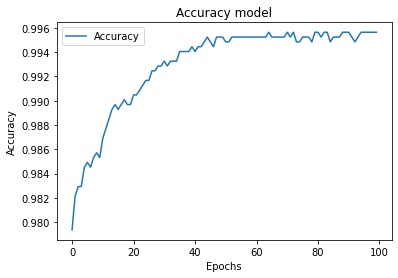

In [94]:
plt.title('Accuracy model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
sns.lineplot(data=epochs_hist.history['accuracy'])
plt.legend(['Accuracy']);